In [326]:
import numpy as np
import pandas as pd
import os # accessing directory structure
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import misc
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
%matplotlib inline

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [327]:
df=api.dataset_download_files('dataregress/dubai-properties-dataset/properties_data.csv')

In [328]:
zf=ZipFile('dubai-properties-dataset.zip')
zf.extractall()
zf.close()

In [329]:
df=pd.read_csv('properties_data.csv')

In [330]:
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [331]:
df.isnull().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [332]:
df.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


Text(0.5, 0.98, 'Distribution by Neighborhood')

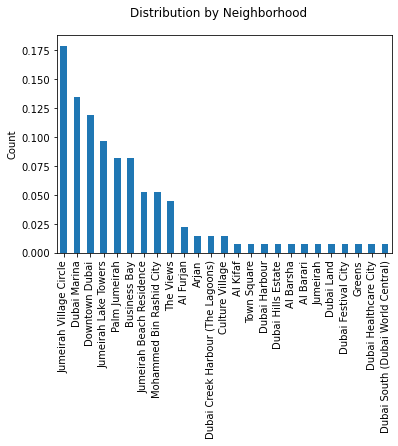

In [333]:
df_highq=df[df['quality']=='High']
nb_vals=pd.Series(df_highq['neighborhood'].value_counts())
(nb_vals/df_highq.shape[0]).plot(kind='bar')
plt.ylabel('Count')
plt.suptitle('Distribution by Neighborhood')

In [334]:
df['size_in_sqm']=df['size_in_sqft']*0.092903
df['price_per_sqm']=df['price']/df['size_in_sqm']
df.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,size_in_sqm,price_per_sqm
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861,131.648233,14286.339486
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117,82.821876,7195.393515
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000,27.313482,3895.164824
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000,78.038520,9374.482782
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000,118.079713,12589.374329
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000,158.213809,17464.472089
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000,889.639128,51729.973893


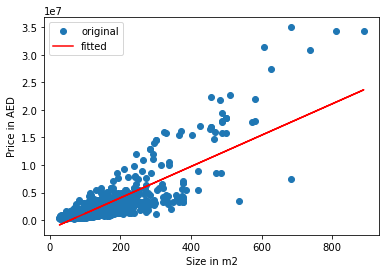

LinregressResult(slope=28441.741604766514, intercept=-1658475.1444257973, rvalue=0.8085948206195842, pvalue=0.0, stderr=474.4094390442853)


In [335]:
p=df['price'] #price
ssqm=df['size_in_sqm'] #size in sqm

res=stats.linregress(ssqm,p) #using linregress to calculate r2 for size vs. price

plt.plot(ssqm, p, 'o', label='original') #scatter
plt.plot(ssqm, res.intercept + res.slope*ssqm, 'r', label='fitted') #fitted line
plt.legend()
plt.xlabel('Size in m2')
plt.ylabel('Price in AED')
plt.show()
print(res) #80% of variance in the price can be explained by the size

Text(0.5, 0.98, 'Top 10 Neighborhoods by Price')

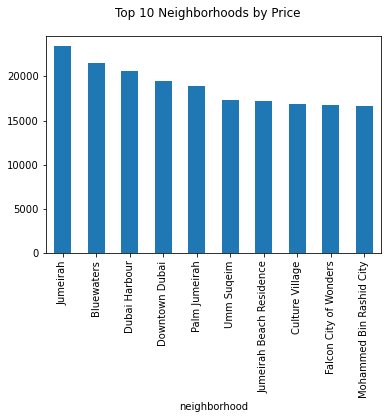

In [336]:
p_by_x=df.groupby('neighborhood')['price_per_sqm'].mean() #average price/sqm by a dimension x -> replace with any
p_by_x_top10=p_by_x.nlargest(10, keep='all')
p_by_x_top10.plot(kind='bar')
plt.suptitle('Top 10 Neighborhoods by Price')

In [337]:
pd.crosstab(df.no_of_bathrooms,df.no_of_bedrooms).\
            style.background_gradient(cmap='rocket_r')

no_of_bedrooms,0,1,2,3,4,5
no_of_bathrooms,,,,,,
1,121,185,5,0,0,0
2,3,453,254,13,0,0
3,0,1,445,104,3,0
4,0,0,24,186,18,2
5,0,0,1,34,40,2
6,0,0,0,1,9,1


In [338]:
cat_df=df.select_dtypes(include=['object','bool'])
cat_df


,neighborhood,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,Medium,False,False,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1,Palm Jumeirah,Medium,False,False,True,False,True,True,True,False,...,False,False,True,True,False,False,False,False,True,False
2,Jumeirah Lake Towers,Medium,True,True,True,False,True,False,False,False,...,False,True,True,True,False,False,False,True,True,True
3,Culture Village,Low,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Palm Jumeirah,Medium,False,False,False,False,True,True,False,False,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mohammed Bin Rashid City,Ultra,False,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1901,Mohammed Bin Rashid City,Medium,False,False,True,False,True,True,True,False,...,False,False,True,True,False,False,False,False,True,True
1902,Dubai Creek Harbour (The Lagoons),Medium,True,True,True,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
1903,Jumeirah Village Circle,Medium,False,True,True,False,True,True,True,False,...,False,True,True,True,False,False,False,False,True,True


In [339]:
cat_cols_list=cat_df.columns
cat_cols_list

Index(['neighborhood', 'quality', 'maid_room', 'unfurnished', 'balcony',
       'barbecue_area', 'built_in_wardrobes', 'central_ac',
       'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking',
       'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked',
       'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi',
       'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa',
       'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [340]:
def create_dummy_df(df, cat_cols, dummy_na):
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [341]:
cat_df=df.select_dtypes(include=['object','bool'])
cat_cols_list=cat_df.columns
df_new=create_dummy_df(df, cat_cols_list,dummy_na=False)

In [342]:
df_new.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,size_in_sqm,price_per_sqm,...,private_pool_True,security_True,shared_gym_True,shared_pool_True,shared_spa_True,study_True,vastu_compliant_True,view_of_landmark_True,view_of_water_True,walk_in_closet_True
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,...,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861,131.648233,14286.339486,...,0.043045,0.352231,0.660367,0.737008,0.101837,0.101312,0.046194,0.208399,0.343307,0.152231
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117,82.821876,7195.393515,...,0.203011,0.477791,0.473709,0.440374,0.302514,0.301821,0.209961,0.406270,0.474938,0.359339
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000,27.313482,3895.164824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000,78.038520,9374.482782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000,118.079713,12589.374329,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000,158.213809,17464.472089,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000,889.639128,51729.973893,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [343]:
y=df_new['price']
df_new=df_new.drop(['price','price_per_sqft','price_per_sqm','size_in_sqft','size_in_sqm'],axis=1)
X=df_new

In [344]:
X.shape

(1905, 89)

In [345]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

y_train_preds = lm_model.predict(X_train) #predict price in the training set
y_test_preds = lm_model.predict(X_test) #predict price in the test set

train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

In [346]:
train_score

0.49623630001026253

In [347]:
print('The r2 for a simple regression is '+str(res.rvalue)+' and the r2 for the test for the model is '+str(test_score))

The r2 for a simple regression is 0.8085948206195842 and the r2 for the test for the model is 0.4057571453901102


In [351]:
#creating yet another df with dummy variables but without neighborhoud
cat_df2=df[['neighborhood','quality']]
cat_cols_list2=cat_df2.columns
df_new2=create_dummy_df(cat_df2,cat_cols_list2,dummy_na=False)
X=df_new2

In [352]:
#selecting best 10 features
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                                    Specs        Score
23   neighborhood_Dubai Residence Complex  1904.000000
52                 neighborhood_wasl gate  1904.000000
39               neighborhood_Mina Rashid  1904.000000
40                    neighborhood_Mirdif  1687.333333
55                          quality_Ultra  1623.481906
30        neighborhood_International City  1621.187500
27    neighborhood_Falcon City of Wonders  1584.500000
0                  neighborhood_Al Barsha  1504.125000
41  neighborhood_Mohammed Bin Rashid City  1484.438146
46                   neighborhood_Remraam  1396.291667


In [353]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

y_train_preds = lm_model.predict(X_train) #predict price in the training set
y_test_preds = lm_model.predict(X_test) #predict price in the test set

train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

In [355]:
train_score

0.17224852779776012

In [ ]:
#Considering the above we can conclude that neighborhood doesnt have massive impact on the price